In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('Marathon_stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4942 non-null   int64  
 1   gender             4941 non-null   object 
 2   age                4942 non-null   float64
 3   hypertension       4942 non-null   int64  
 4   heart_disease      4942 non-null   int64  
 5   ever_married       4942 non-null   object 
 6   work_type          4942 non-null   object 
 7   Residence_type     4942 non-null   object 
 8   avg_glucose_level  4942 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4942 non-null   object 
 11  stroke             4942 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 463.4+ KB


In [26]:
df.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  33
smoking_status        0
stroke                0
dtype: int64

In [23]:
df['gender'].fillna('Other',inplace=True)

In [24]:
df['gender'].value_counts()

gender
Female    2915
Male      2025
Other        2
Name: count, dtype: int64

In [29]:
df['bmi'].fillna()

bmi
False    4909
True       33
Name: count, dtype: int64

In [33]:
df['bmi'].fillna((df['bmi'].mean()))

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
4937    18.600000
4938    40.000000
4939    30.600000
4940    25.600000
4941    26.200000
Name: bmi, Length: 4942, dtype: float64

In [37]:
df['bmi'].isnull().value_counts()

bmi
False    4942
Name: count, dtype: int64

In [36]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())


In [38]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [39]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [44]:
for i in df.select_dtypes(include='object'):
    print(i,"====",df[i].unique())


gender ==== ['Male' 'Female' 'Other']
ever_married ==== ['Yes' 'No']
work_type ==== ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ==== ['Urban' 'Rural']
smoking_status ==== ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [46]:
cols= df.select_dtypes(include={'int','float'})
corrl=cols.corr()
corrl

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.006917,0.000515,0.002515,0.005669,0.003073,0.001257
age,0.006917,1.000000,0.273991,0.257636,0.235417,0.331655,0.246512
hypertension,0.000515,0.273991,1.000000,0.115941,0.176146,0.167089,0.135301
heart_disease,0.002515,0.257636,0.115941,1.000000,0.154974,0.040953,0.141112
avg_glucose_level,0.005669,0.235417,0.176146,0.154974,1.000000,0.174439,0.138403
bmi,0.003073,0.331655,0.167089,0.040953,0.174439,1.000000,0.039511
stroke,0.001257,0.246512,0.135301,0.141112,0.138403,0.039511,1.000000


<Axes: >

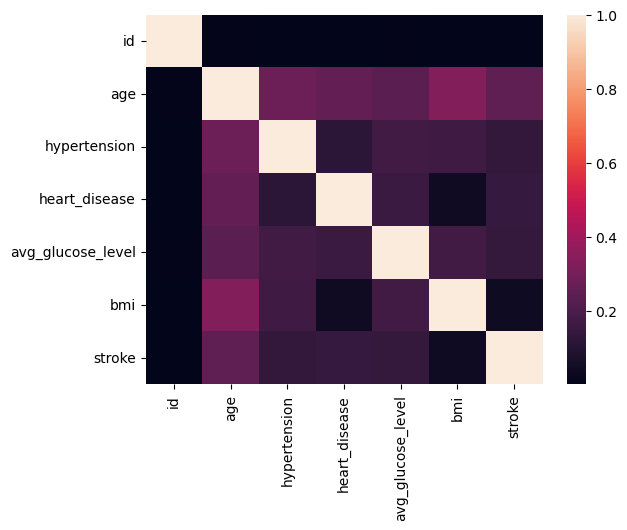

In [47]:
import seaborn as sns
sns.heatmap(corrl)

In [50]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
cols=df.select_dtypes(include='object').columns
for col in cols:
    df[col]=lc.fit_transform(df[col])

In [51]:
df.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1


In [54]:
df.drop(columns='id')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4937,0,13.0,0,0,0,4,0,103.08,18.600000,0,0
4938,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
4939,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
4940,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [58]:
model=LinearRegression()
x=df.drop(columns='avg_glucose_level')
x.head()
y=df['avg_glucose_level']
y.head()


0    228.69
1    202.21
2    105.92
3    171.23
4    174.12
Name: avg_glucose_level, dtype: float64

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (3459, 11)
x_test : (1483, 11)
y_train : (3459,)
y_test : (1483,)


In [62]:
model.fit(x_train,y_train)

LinearRegression()

In [64]:
y_pred=model.predict(x_test)
y_pred[:5]
y_pred.shape

(1483,)

In [65]:
mse=mean_absolute_error(y_test,y_pred)
mse

31.70994818866978

In [67]:
r2=r2_score(y_test,y_pred)
r2

0.11191854709992188

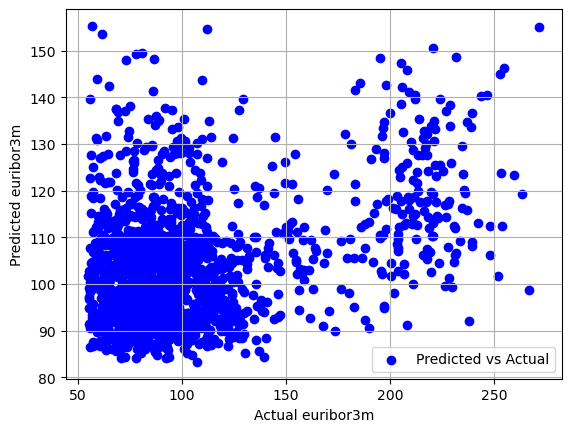

In [69]:
import  matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual euribor3m')
plt.ylabel('Predicted euribor3m')
plt.legend()
plt.grid()
plt.show()

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

polymodel=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
polymodel.fit(x_train,y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [71]:
modl=polymodel.predict(x_test)


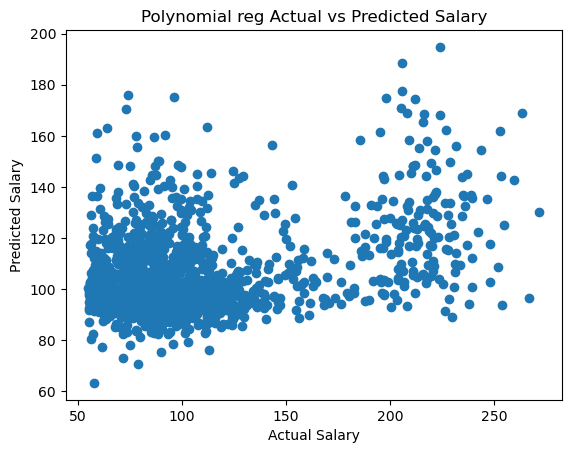

In [72]:
plt.scatter(y_test,modl)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Polynomial reg Actual vs Predicted Salary')
plt.show()

In [73]:
accuracy=r2_score(y_test,modl)
accuracy

0.1462153332620174

In [74]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [75]:
df.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1


In [78]:
X=df.drop(columns='stroke')
Y=df['stroke']

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
model.fit(X_train,Y_train)


LogisticRegression()

In [82]:
Y_pred=model.predict(X_test)
Y_pred.shape

(1483,)

In [83]:
confusion_matrix(Y_test,Y_pred)

array([[1396,    2],
       [  85,    0]], dtype=int64)

<Axes: >

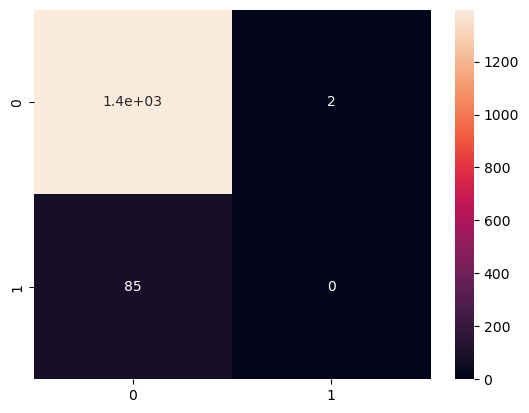

In [85]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9413351314902225

In [87]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred)

0.49928469241773965